# 'Content Trends Analysis for Strategic Recommendations- NETFLIX DATASET'

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
net=pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\VOIS\Netflix Dataset.csv")

In [41]:
net.head(20)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


# DATA CLEANING

In [43]:
net.isnull().sum()[net.isnull().sum()>0]

Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
dtype: int64

In [45]:
net.shape

(7789, 11)

In [47]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [49]:
net.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [51]:
net = net[net[['Release_Date', 'Rating']].notna().all(axis=1)]

In [53]:
net.isnull().sum()[net.isnull().sum()>0]

Director    2375
Cast         718
Country      505
dtype: int64

In [55]:
net.Director.unique()

array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
       'Mozez Singh', 'Sam Dunn'], dtype=object)

In [57]:
net['Director'] = net['Director'].fillna('not_available')
net['Country']=net['Country'].fillna('unknown_country')

In [59]:
net.columns = [c.strip().lower().replace(" ", "_") for c in net.columns]

In [63]:
net['release_date'] = pd.to_datetime(net['release_date'], errors='coerce')
net['release_year'] = net['release_date'].dt.year

In [67]:
net['genres_list'] = net['type'].astype(str).apply(lambda x: [g.strip() for g in x.split(",")])

# Split country column into list (some titles have multiple countries)
net['country_list'] = net['country'].astype(str).apply(lambda x: [c.strip() for c in x.split(",")])

# EXPLORATORY DATA ANALYSIS

In [83]:
# 3a. Total Movies vs TV Shows
movies_count = net[net['category'] == "Movie"].shape[0]
tv_count = net[net['category'] == "TV Show"].shape[0]
print("Total Movies:", movies_count)
print("Total TV Shows:", tv_count)

# 3b. Most common genres
from collections import Counter
all_genres = [g for sublist in net['genres_list'] for g in sublist]
genre_counts = Counter(all_genres).most_common(10)
print("\nTop 10 Genres:")
print(genre_counts)

# 3c. Country contributions
all_countries = [c for sublist in net['country_list'] for c in sublist]
country_counts = Counter(all_countries).most_common(10)
print("\nTop 10 Countries:")
print(country_counts)


Total Movies: 5374
Total TV Shows: 2398

Top 10 Genres:
[('International Movies', 2437), ('Dramas', 2107), ('Comedies', 1472), ('International TV Shows', 1197), ('Documentaries', 786), ('Action & Adventure', 721), ('TV Dramas', 703), ('Independent Movies', 675), ('Children & Family Movies', 532), ('Romantic Movies', 531)]

Top 10 Countries:
[('United States', 3289), ('India', 990), ('United Kingdom', 722), ('unknown_country', 505), ('Canada', 412), ('France', 349), ('Japan', 285), ('Spain', 215), ('South Korea', 212), ('Germany', 199)]


# VISUALIZATIONS

# a) Movies vs TV Shows

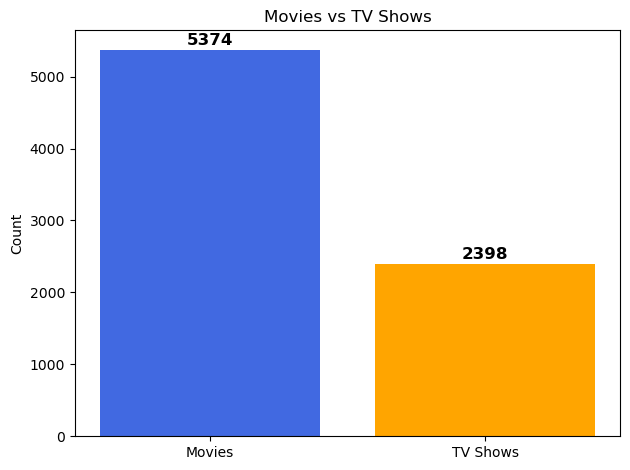

In [104]:
categories = ["Movies", "TV Shows"]
counts = [movies_count, tv_count]
colors = ['royalblue', 'orange']

# Create bar chart with colors
plt.bar(categories, counts, color=colors)
plt.title("Movies vs TV Shows")
plt.ylabel("Count")

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 30, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


# b) Top 10 Genres`

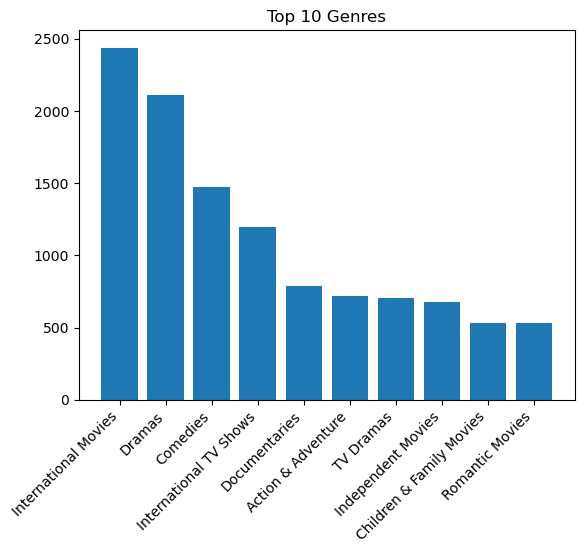

In [115]:
genres, counts = zip(*genre_counts)
plt.bar(genres, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Genres")
plt.show()

# c) Top 10 Countries

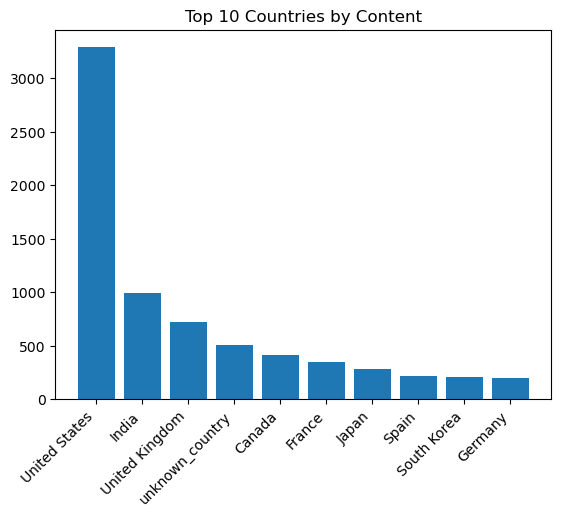

In [97]:
countries, counts = zip(*country_counts)
plt.bar(countries, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries by Content")
plt.show()

# Conclusion